## Nigerian Car Price Prediction.

**In this problem we need to see if we can predict how much will be the price of the car, we don't have a good database, our database has 4095 values and 10 columns, here we will use the "Nigerian_Car_Prices.csv" database that was made available for use, below you will see an analysis of the data, the processing of that data, Grouping of the data, and the use of machine learning models to achieve our goal.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Nigerian_Car_Prices.csv')

In [3]:
df.head()

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
df.shape

(4095, 9)

In [6]:
df.columns

Index(['Make', 'Year of manufacture', 'Condition', 'Mileage', 'Engine Size',
       'Fuel', 'Transmission', 'Price', 'Build'],
      dtype='object')

## Data Preprocessing

In [7]:
df.isnull().sum()

Make                      0
Year of manufacture     478
Condition               479
Mileage                  71
Engine Size             511
Fuel                    488
Transmission             20
Price                     0
Build                  2968
dtype: int64

In [8]:
def report_missing(df):
    percent_nan=df.isnull().sum()/len(df)*100
    percent_nan=percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [9]:
missing=report_missing(df)

In [10]:
missing

Transmission            0.488400
Mileage                 1.733822
Year of manufacture    11.672772
Condition              11.697192
Fuel                   11.916972
Engine Size            12.478632
Build                  72.478632
dtype: float64

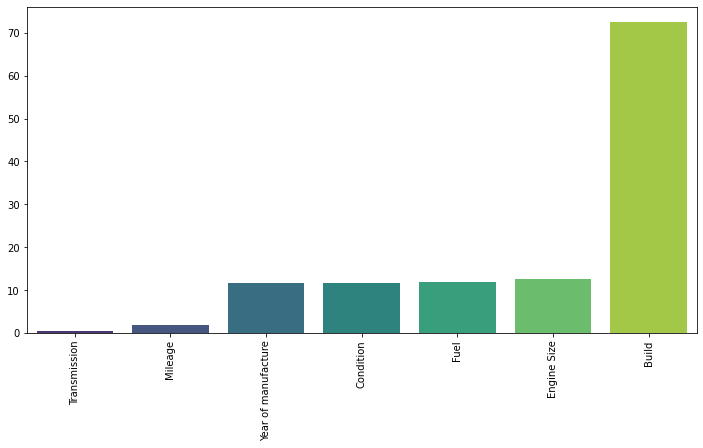

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.xticks(rotation=90);

In [12]:
df=df.drop('Build',axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  3617 non-null   float64
 2   Condition            3616 non-null   object 
 3   Mileage              4024 non-null   float64
 4   Engine Size          3584 non-null   float64
 5   Fuel                 3607 non-null   object 
 6   Transmission         4075 non-null   object 
 7   Price                4095 non-null   object 
dtypes: float64(3), object(5)
memory usage: 256.1+ KB


In [14]:
#Removing the commas from the price column and converting it to a floating number
df['Price']=df['Price'].str.replace(',','').astype(float)

In [15]:
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0
1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,5834000.0
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,3640000.0
3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,3594000.0
4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,8410000.0


In [16]:
missing

Transmission            0.488400
Mileage                 1.733822
Year of manufacture    11.672772
Condition              11.697192
Fuel                   11.916972
Engine Size            12.478632
Build                  72.478632
dtype: float64

In [17]:
#filling the missing values
df['Make']=df['Make'].fillna(df['Make'].mode()[0])
df['Mileage']=df['Mileage'].fillna(df['Mileage'].median())
df['Year of manufacture']=df['Year of manufacture'].fillna(df['Year of manufacture'].median())
df['Condition']=df['Condition'].fillna(df['Condition'].mode()[0])
df['Fuel']=df['Fuel'].fillna(df['Fuel'].mode()[0])
df['Engine Size']=df['Engine Size'].fillna(df['Engine Size'].median())

In [18]:
report_missing(df)

Transmission    0.4884
dtype: float64

In [19]:
df.isnull().sum()

Make                    0
Year of manufacture     0
Condition               0
Mileage                 0
Engine Size             0
Fuel                    0
Transmission           20
Price                   0
dtype: int64

In [20]:
df['Transmission']=df['Transmission'].fillna(df['Transmission'].mode()[0])

In [21]:
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0
1,Lexus,2008.0,Nigerian Used,138024.0,2500.0,Petrol,Automatic,5834000.0
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,3640000.0
3,Lexus,2008.0,Nigerian Used,213362.0,2500.0,Petrol,Automatic,3594000.0
4,Mercedes-Benz,2008.0,Nigerian Used,106199.0,2500.0,Petrol,Automatic,8410000.0


In [22]:
df['Condition'].unique()

array(['Nigerian Used', 'Foreign Used', 'Brand New'], dtype=object)

In [23]:
df.corr()

,Year of manufacture,Mileage,Engine Size,Price
Year of manufacture,1.000000,-0.195705,0.010103,0.486319
Mileage,-0.195705,1.000000,0.002490,-0.156533
Engine Size,0.010103,0.002490,1.000000,0.054534
Price,0.486319,-0.156533,0.054534,1.000000


## EDA

<AxesSubplot:xlabel='Transmission', ylabel='count'>

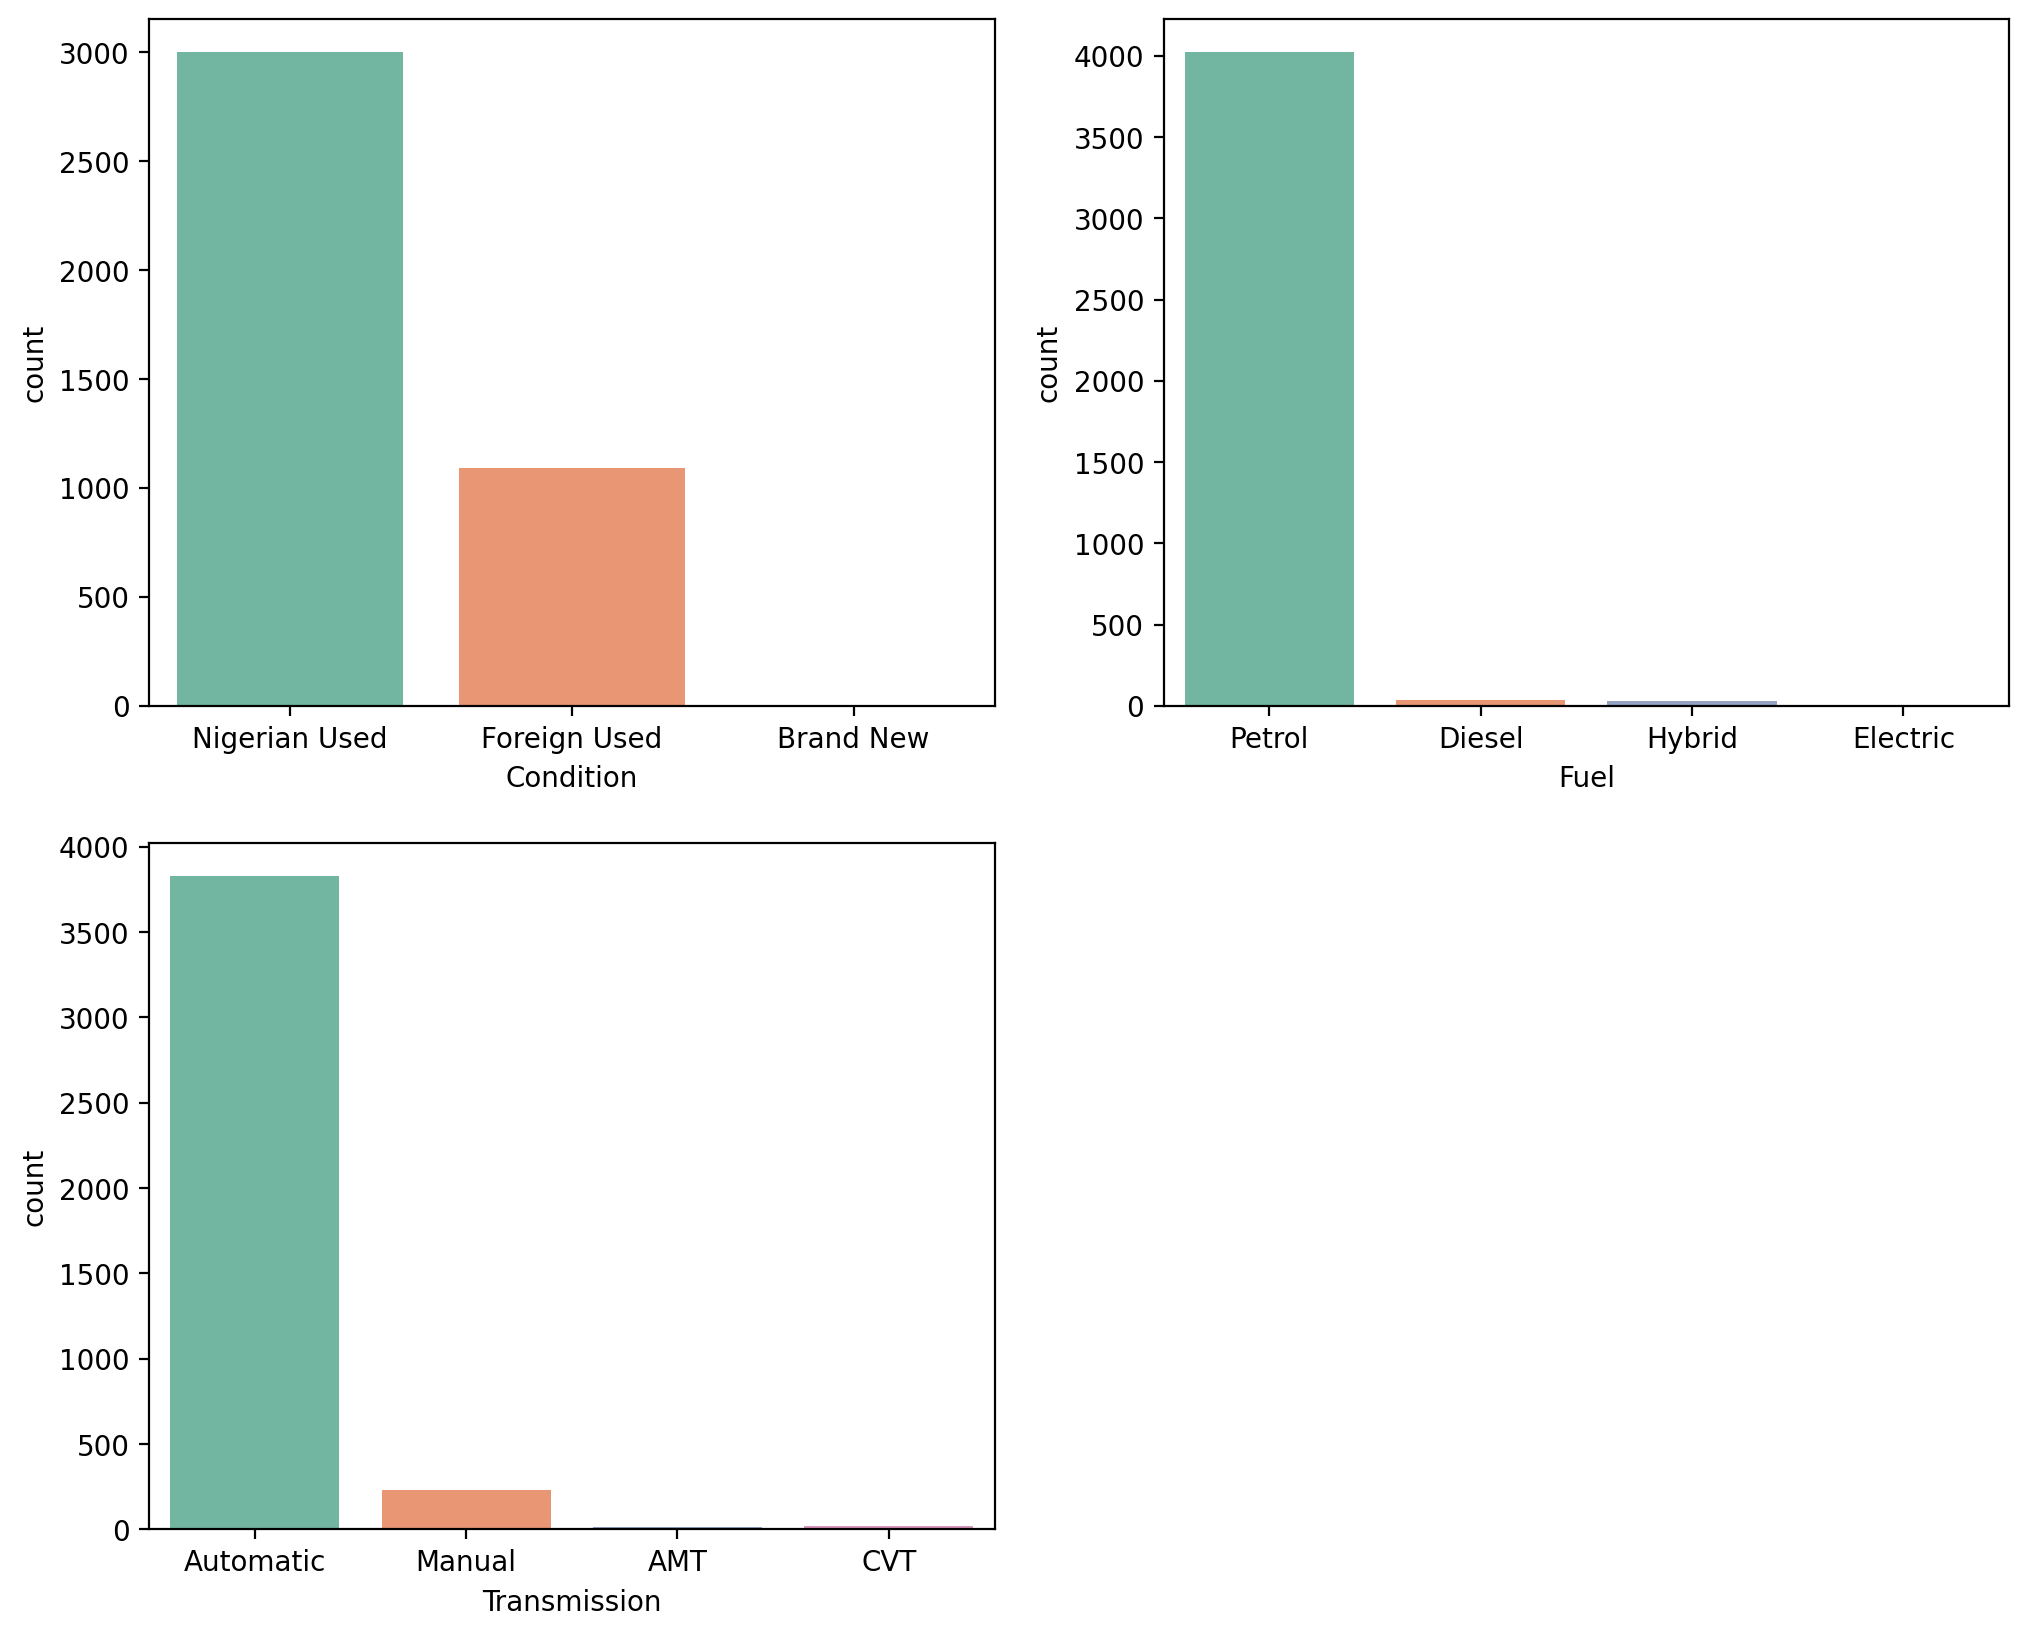

In [24]:
plt.figure(figsize=(12,10),dpi=200)
plt.subplot(2,2,1)
sns.countplot(x='Condition',data=df, palette='Set2')

plt.subplot(2,2,2)
sns.countplot(x='Fuel',data=df, palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='Transmission',data=df, palette='Set2')



<AxesSubplot:xlabel='Price'>

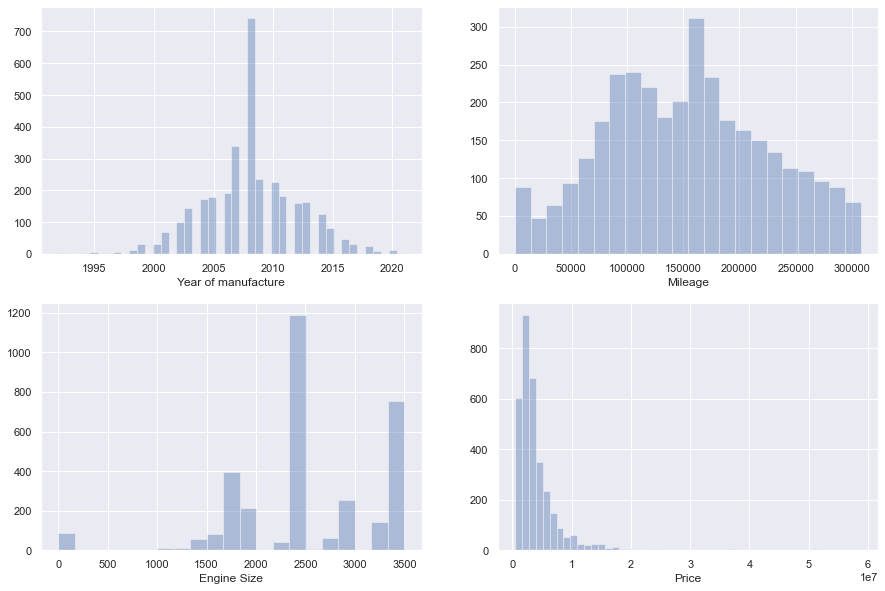

In [280]:
plt.figure(figsize = (15,10))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(data['Year of manufacture'], kde = False)

plt.subplot(2,2,2)
sns.distplot(data.Mileage, kde = False)

plt.subplot(2,2,3)
sns.distplot(data['Engine Size'], kde = False)

plt.subplot(2,2,4)
sns.distplot(data.Price, kde = False)

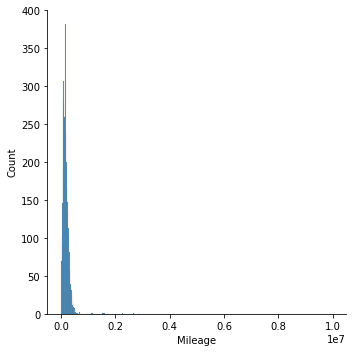

In [25]:
sns.displot(x='Mileage',data=df)

<AxesSubplot:xlabel='Year of manufacture', ylabel='Density'>

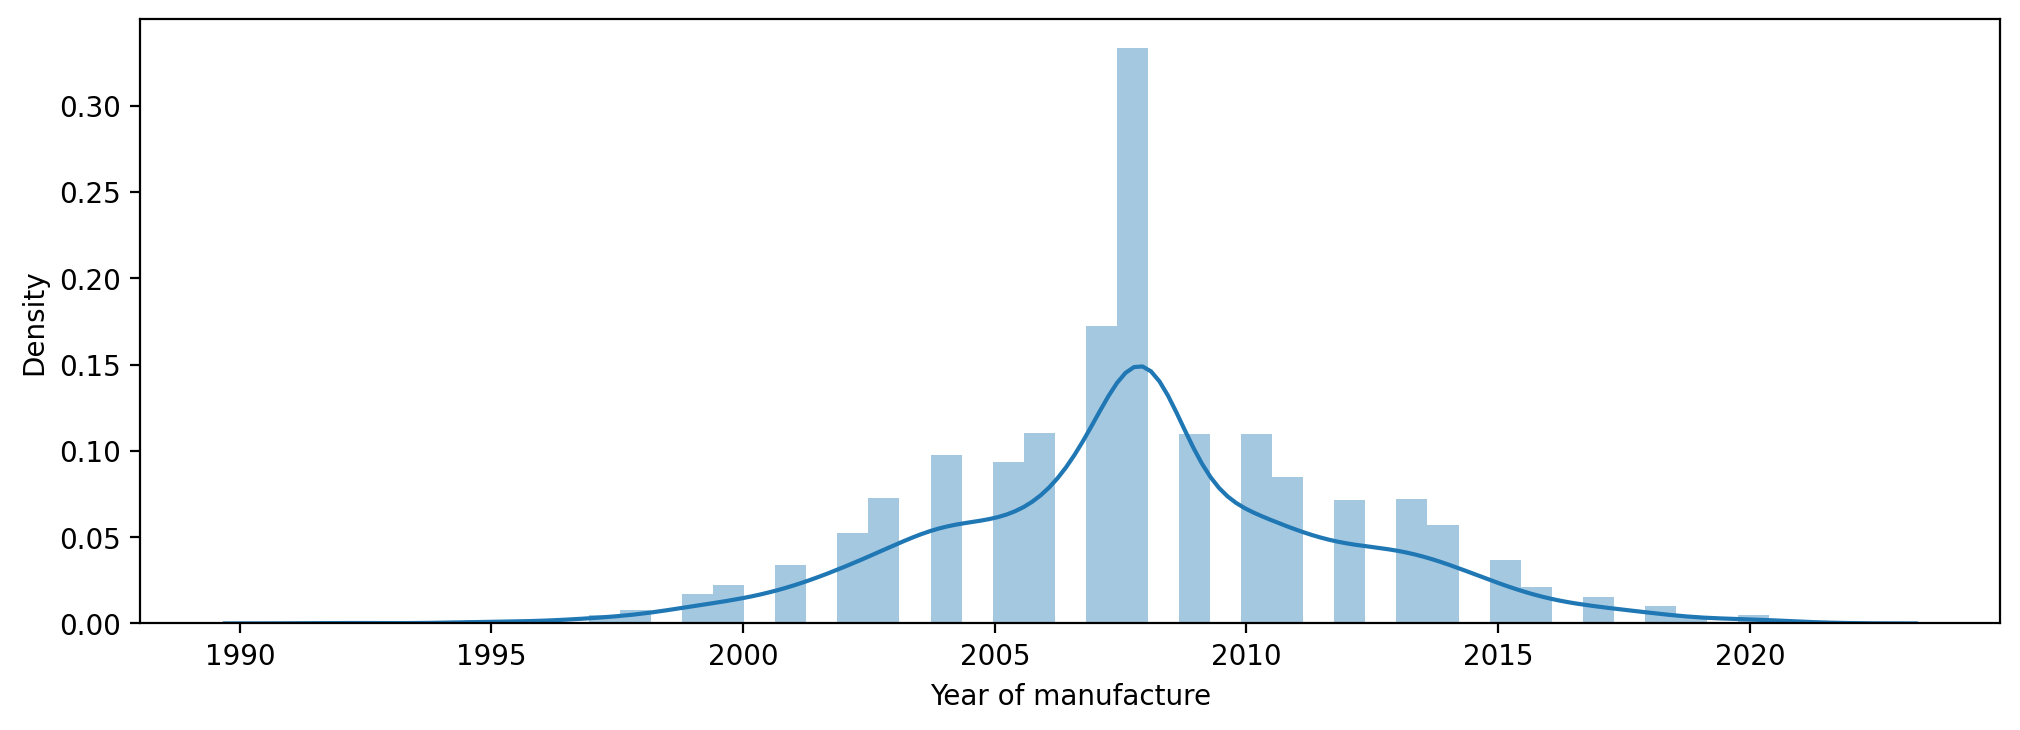

In [26]:
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(df['Year of manufacture'])

<AxesSubplot:xlabel='Engine Size', ylabel='Density'>

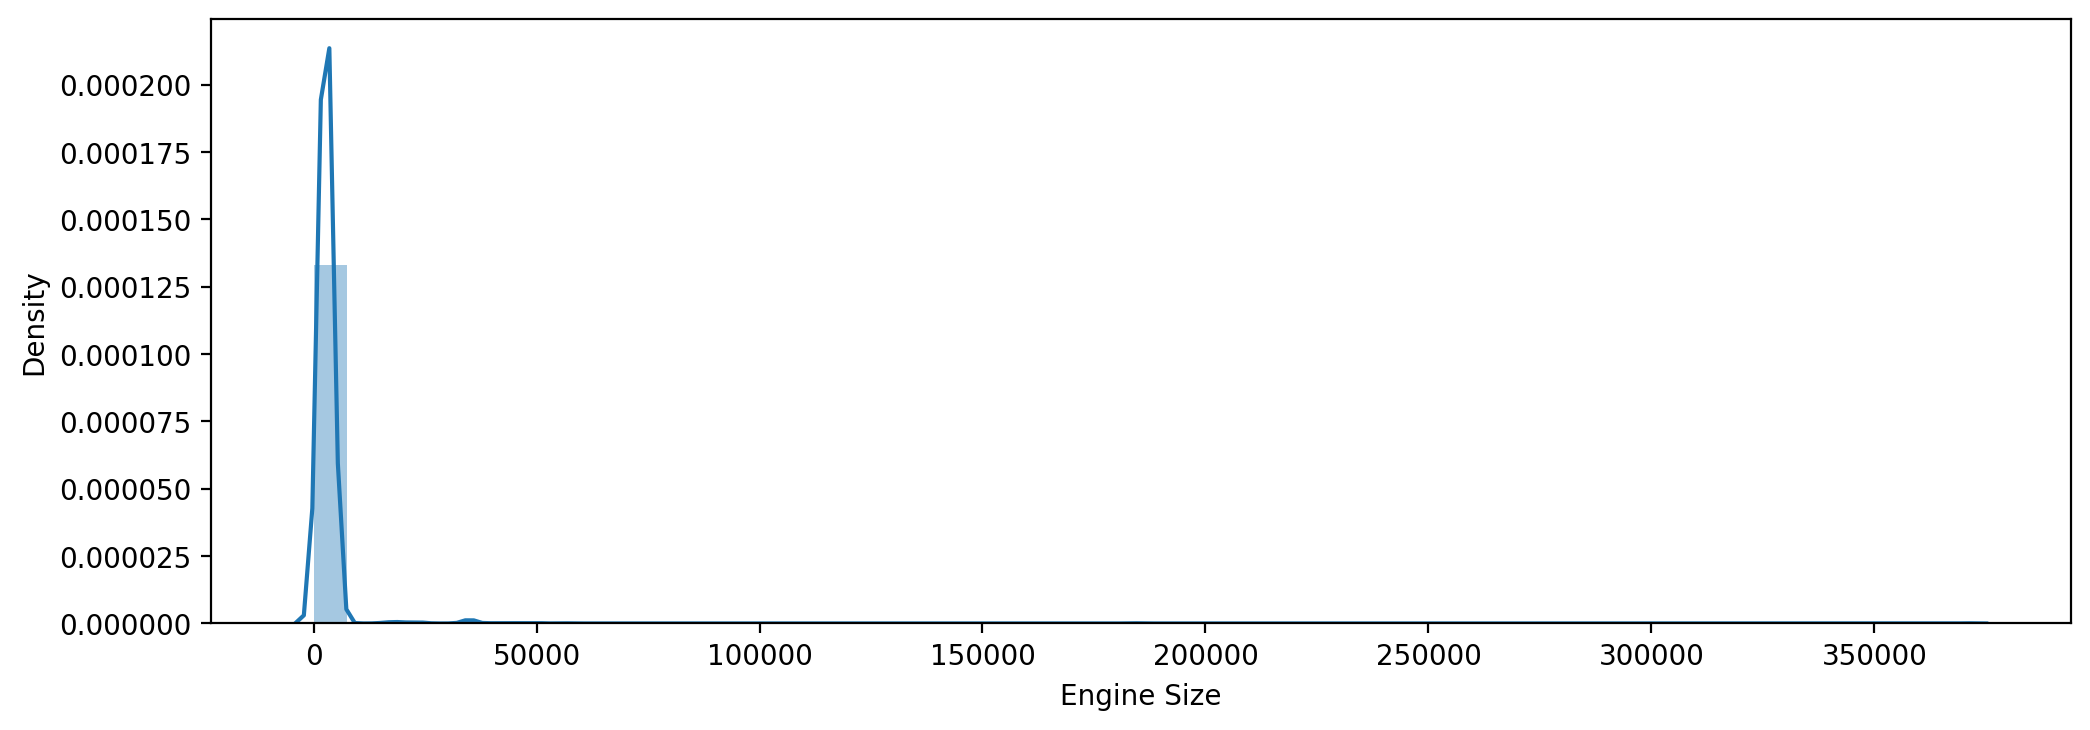

In [27]:
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(df['Engine Size'])

<Figure size 2400x800 with 0 Axes>

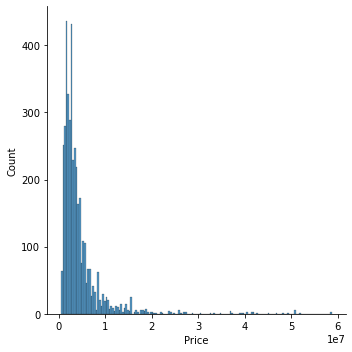

In [28]:
plt.figure(figsize=(12,4),dpi=200)
sns.displot(df['Price'])

<AxesSubplot:xlabel='Mileage'>

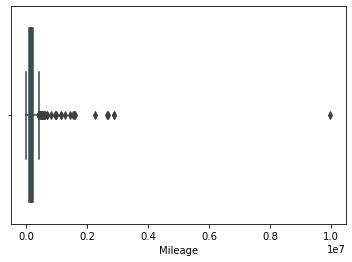

In [29]:
sns.boxplot(df['Mileage'])

<AxesSubplot:xlabel='Engine Size'>

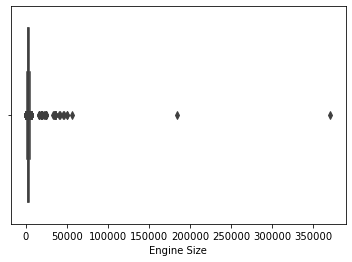

In [30]:
sns.boxplot(df['Engine Size'])

In [31]:
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0
1,Lexus,2008.0,Nigerian Used,138024.0,2500.0,Petrol,Automatic,5834000.0
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,3640000.0
3,Lexus,2008.0,Nigerian Used,213362.0,2500.0,Petrol,Automatic,3594000.0
4,Mercedes-Benz,2008.0,Nigerian Used,106199.0,2500.0,Petrol,Automatic,8410000.0


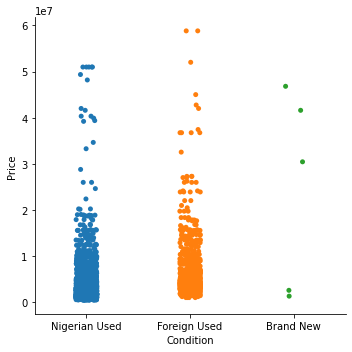

In [32]:
sns.catplot(x='Condition',y='Price',data=df)

<AxesSubplot:xlabel='Condition', ylabel='Price'>

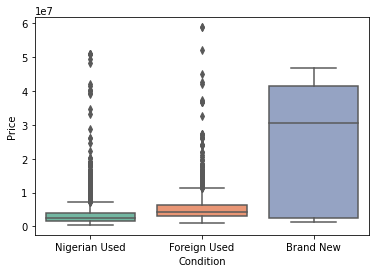

In [33]:
sns.boxplot(x='Condition',y='Price',data=df, palette='Set2')

In [34]:
df.describe()

,Year of manufacture,Mileage,Engine Size,Price
count,4095.000000,4.095000e+03,4095.000000,4.095000e+03
mean,2007.910379,1.821664e+05,3178.270085,4.271288e+06
std,4.041435,2.091046e+05,7201.910280,4.900064e+06
min,1992.000000,1.000000e+00,3.000000,4.580000e+05
25%,2005.000000,1.025985e+05,2400.000000,1.872000e+06
50%,2008.000000,1.613525e+05,2500.000000,2.940000e+06
75%,2010.000000,2.306370e+05,3500.000000,4.725000e+06
max,2021.000000,9.976050e+06,371000.000000,5.880000e+07


<AxesSubplot:xlabel='Fuel', ylabel='Price'>

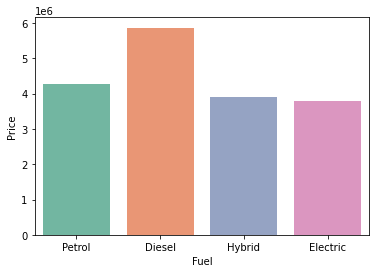

In [35]:
sns.barplot(x='Fuel',y='Price',data=df, ci=None, palette='Set2')

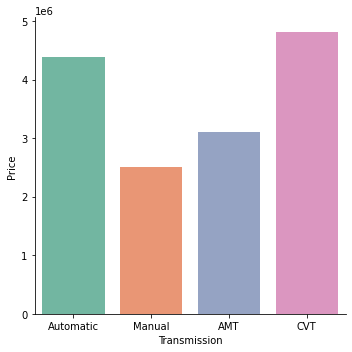

In [36]:
sns.catplot(x='Transmission',y='Price',data=df, palette='Set2',kind='bar',ci=None)

In [37]:
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0
1,Lexus,2008.0,Nigerian Used,138024.0,2500.0,Petrol,Automatic,5834000.0
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,3640000.0
3,Lexus,2008.0,Nigerian Used,213362.0,2500.0,Petrol,Automatic,3594000.0
4,Mercedes-Benz,2008.0,Nigerian Used,106199.0,2500.0,Petrol,Automatic,8410000.0


<AxesSubplot:xlabel='Year of manufacture', ylabel='Price'>

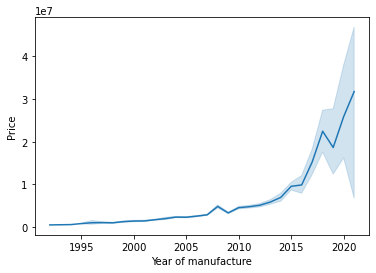

In [38]:
sns.lineplot(x='Year of manufacture',y='Price',data=df)

In [39]:
df.shape

(4095, 8)

<AxesSubplot:xlabel='Mileage'>

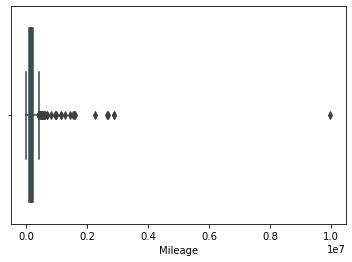

In [40]:
sns.boxplot(df['Mileage'])

In [41]:
np.percentile(df['Mileage'],99)

482800.0

In [42]:
df=df[df['Mileage']<np.percentile(df['Mileage'],90)]

In [43]:
df.shape

(3685, 8)

<AxesSubplot:xlabel='Mileage'>

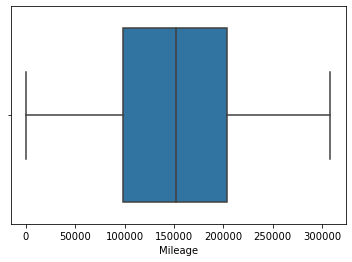

In [44]:
sns.boxplot(df['Mileage'])

<AxesSubplot:xlabel='Engine Size'>

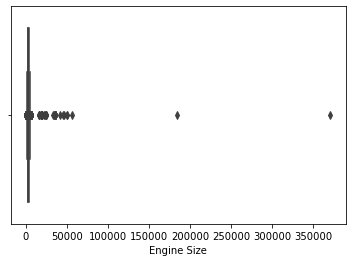

In [45]:
sns.boxplot(df['Engine Size'])

In [46]:
df=df[df['Engine Size']<=np.percentile(df['Engine Size'],90)]

In [47]:
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0
1,Lexus,2008.0,Nigerian Used,138024.0,2500.0,Petrol,Automatic,5834000.0
3,Lexus,2008.0,Nigerian Used,213362.0,2500.0,Petrol,Automatic,3594000.0
4,Mercedes-Benz,2008.0,Nigerian Used,106199.0,2500.0,Petrol,Automatic,8410000.0
5,Mercedes-Benz,2008.0,Nigerian Used,87660.0,2500.0,Petrol,Automatic,5554000.0


In [48]:
df.shape

(3321, 8)

<AxesSubplot:xlabel='Engine Size'>

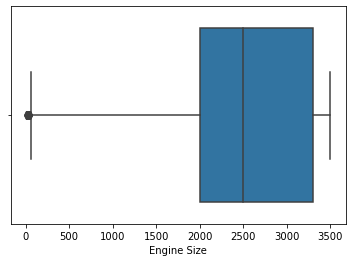

In [49]:
sns.boxplot(df['Engine Size'])

<AxesSubplot:xlabel='Engine Size', ylabel='Price'>

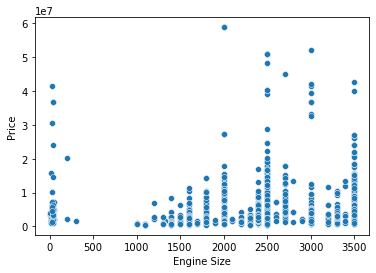

In [50]:
sns.scatterplot(df['Engine Size'],df['Price'])

In [51]:
data=df.copy()

In [52]:
data.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0
1,Lexus,2008.0,Nigerian Used,138024.0,2500.0,Petrol,Automatic,5834000.0
3,Lexus,2008.0,Nigerian Used,213362.0,2500.0,Petrol,Automatic,3594000.0
4,Mercedes-Benz,2008.0,Nigerian Used,106199.0,2500.0,Petrol,Automatic,8410000.0
5,Mercedes-Benz,2008.0,Nigerian Used,87660.0,2500.0,Petrol,Automatic,5554000.0


In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [54]:
label=LabelEncoder()

In [55]:
df['Make']=label.fit_transform(df['Make'])

In [56]:
df['Fuel']=label.fit_transform(df['Fuel'])
df['Transmission']=label.fit_transform(df['Transmission'])

In [57]:
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,42,2007.0,Nigerian Used,166418.0,2400.0,3,1,3120000.0
1,24,2008.0,Nigerian Used,138024.0,2500.0,3,1,5834000.0
3,24,2008.0,Nigerian Used,213362.0,2500.0,3,1,3594000.0
4,28,2008.0,Nigerian Used,106199.0,2500.0,3,1,8410000.0
5,28,2008.0,Nigerian Used,87660.0,2500.0,3,1,5554000.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 4094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 3321 non-null   int32  
 1   Year of manufacture  3321 non-null   float64
 2   Condition            3321 non-null   object 
 3   Mileage              3321 non-null   float64
 4   Engine Size          3321 non-null   float64
 5   Fuel                 3321 non-null   int32  
 6   Transmission         3321 non-null   int32  
 7   Price                3321 non-null   float64
dtypes: float64(4), int32(3), object(1)
memory usage: 194.6+ KB


In [59]:
df=pd.get_dummies(df,drop_first=True)

In [60]:
df.head()

,Make,Year of manufacture,Mileage,Engine Size,Fuel,Transmission,Price,Condition_Foreign Used,Condition_Nigerian Used
0,42,2007.0,166418.0,2400.0,3,1,3120000.0,0,1
1,24,2008.0,138024.0,2500.0,3,1,5834000.0,0,1
3,24,2008.0,213362.0,2500.0,3,1,3594000.0,0,1
4,28,2008.0,106199.0,2500.0,3,1,8410000.0,0,1
5,28,2008.0,87660.0,2500.0,3,1,5554000.0,0,1


In [61]:
df.shape

(3321, 9)

<AxesSubplot:>

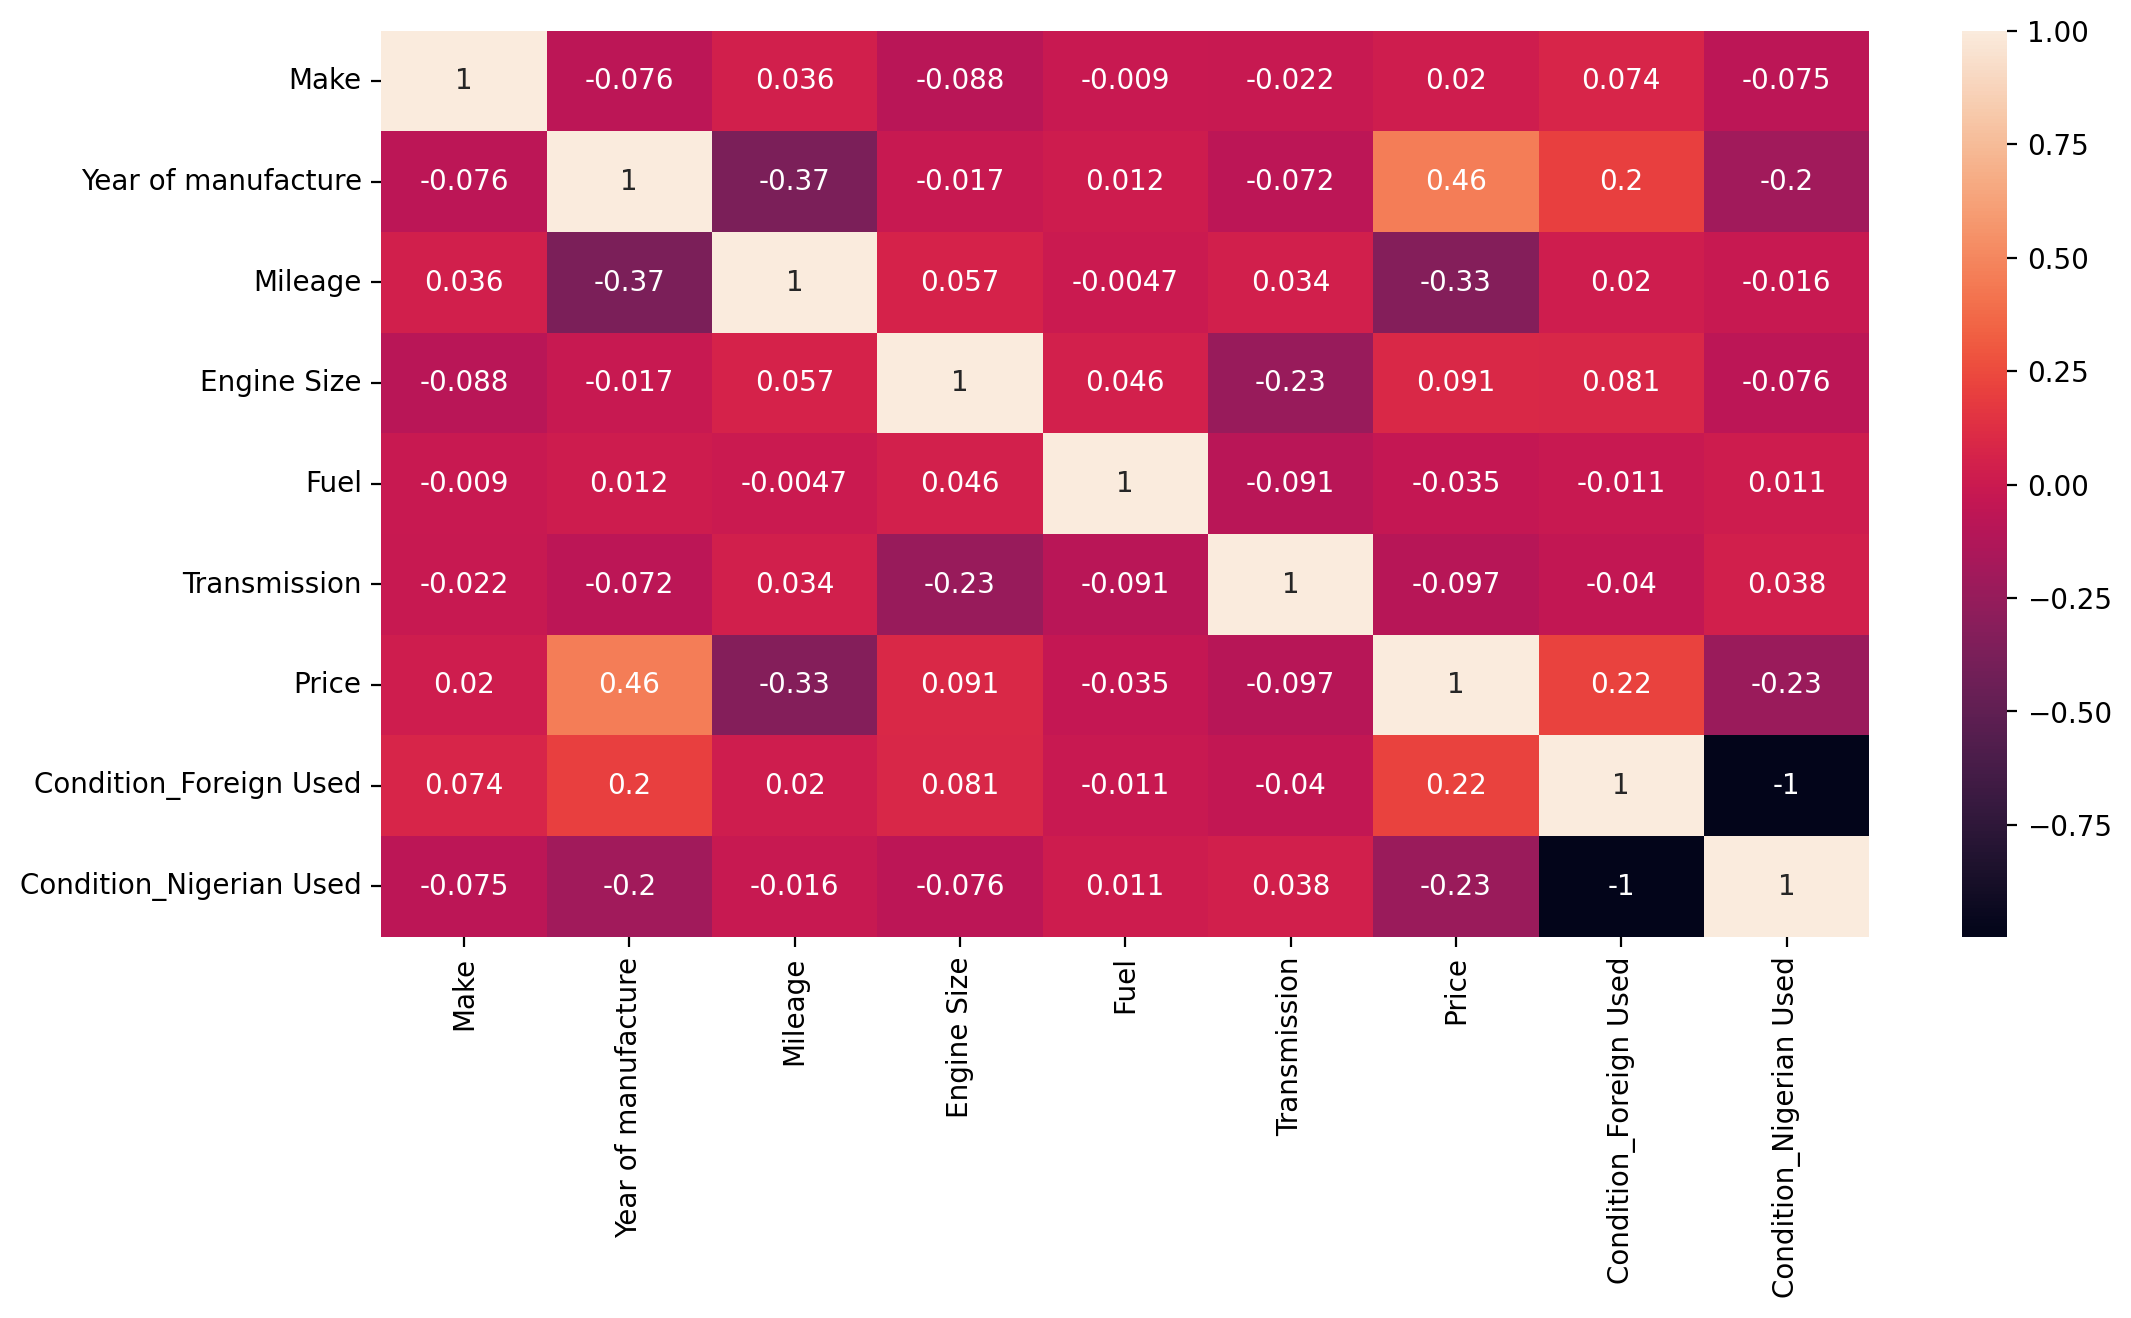

In [62]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [63]:
X=df.drop('Price',axis=1)

In [64]:
y=df['Price']

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [67]:
X_train.shape

(2324, 8)

In [68]:
X_test.shape

(997, 8)

In [69]:
X_train.describe()

,Make,Year of manufacture,Mileage,Engine Size,Fuel,Transmission,Condition_Foreign Used,Condition_Nigerian Used
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,29.382530,2008.210413,151547.999785,2547.474613,2.957831,1.122203,0.256454,0.742255
std,12.161295,4.003986,72328.866316,754.220314,0.322674,0.483607,0.436770,0.437487
min,0.000000,1992.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2006.000000,97287.000000,2000.000000,3.000000,1.000000,0.000000,0.000000
50%,28.000000,2008.000000,151841.000000,2500.000000,3.000000,1.000000,0.000000,1.000000
75%,42.000000,2011.000000,201489.250000,3300.000000,3.000000,1.000000,1.000000,1.000000
max,44.000000,2021.000000,308182.000000,3500.000000,3.000000,3.000000,1.000000,1.000000


In [70]:
scaler=StandardScaler()

In [71]:
X_train_scaler=scaler.fit_transform(X_train)

In [72]:
X_test_scaler=scaler.transform(X_test)

In [73]:
X_train_scaler.std()

1.0

In [74]:
#sns.pairplot(data)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [76]:
linear_model=LinearRegression()

In [114]:
linear_model.fit(X_train_scaler,y_train)

LinearRegression()

In [115]:
linear_pred=linear_model.predict(X_test_scaler)

In [106]:
#linear_pred

In [116]:
pd.DataFrame({'Actual':y_test,'Predicted':linear_pred})

,Actual,Predicted
2258,1872000.0,1.455381e+06
2339,2496000.0,3.459791e+06
61,3146000.0,4.720283e+06
1020,9975000.0,1.187416e+07
3200,1470000.0,4.642414e+06
...,...,...
1879,6240000.0,5.259880e+06
1891,1560000.0,3.901285e+06
346,7290000.0,4.997862e+06
459,4410000.0,4.850084e+06


In [112]:
linear_model.score(X_test,y_test)

0.26583667532159583

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
np.sqrt(mean_squared_error(y_test,linear_pred))

4108201.402628351

In [84]:
linear_model.coef_.argmax()

1

In [85]:
X.columns[1]

'Year of manufacture'

In [86]:
df['Price'].mean()

4254538.814513701

In [183]:
tree=DecisionTreeRegressor(max_depth=6)

In [184]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [185]:
tree.score(X_test,y_test)

0.623188066384476

In [186]:
np.sqrt(mean_squared_error(y_test,tree.predict(X_test)))

2943185.993460872

In [160]:
tree.score(X_train,y_train)

0.8403099916983784

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
poly=PolynomialFeatures(degree=3, include_bias=False)

In [94]:
from sklearn.tree import plot_tree

In [124]:
def run_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    
    pred=model.predict(x_test)
    
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    
    print(f'RMSE :{rmse}')

In [128]:
run_model(linear_model,X_train_scaler,X_test_scaler,y_train,y_test)

RMSE :4108201.402628351


In [187]:
run_model(tree,X_train,X_test,y_train,y_test)

RMSE :2951827.2320416775


In [118]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [119]:
svr=SVR()

In [140]:
run_model(svr,X_train_scaler,X_test_scaler,y_train,y_test)

RMSE :4922113.167212386


In [199]:
rf=RandomForestRegressor(random_state=101)

In [217]:
run_model(rf,X_train,X_test,y_train,y_test)

RMSE :2422696.437472961


In [201]:
rf.score(X_test,y_test)

0.7446785902360376

In [235]:
rf.score(X_train,y_train)

0.9241742691122916

In [137]:
knn=KNeighborsRegressor()

In [202]:
run_model(knn,X_train_scaler,X_test_scaler,y_train,y_test)

RMSE :3424631.6858791723


In [203]:
knn.score(X_test_scaler,y_test)

0.4898275838931254

In [253]:
gb=GradientBoostingRegressor(random_state=101)

In [254]:
run_model(gb,X_train,X_test,y_train,y_test)

RMSE :2396319.2248546686


In [255]:
gb.score(X_test,y_test)

0.7502079706548974

In [189]:
df['Price'].mean()

4254538.814513701

In [147]:
from xgboost import XGBClassifier

In [148]:
xgb=XGBClassifier()

In [149]:
run_model(xgb,X_train,X_test,y_train,y_test)

[09:34:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RMSE :3036722.7249102276


In [150]:
xgb.score(X_test,y_test)

0.3029087261785356

In [276]:
#help(SVR)

In [192]:
param_grid={'C':[0.001,0.01,0.1,0.5,0.9,1],
           'kernel':['rbf','linear','poly'],
           'gamma':['scale','auto'],
           'degree':[2,3,4],
           'epsilon':[0,0.01,0.1,0.5,1,2]}

In [193]:
grid_svr=GridSearchCV(svr,param_grid=param_grid, scoring='neg_mean_squared_error')

In [194]:
run_model(grid_svr,X_train_scaler,X_test_scaler,y_train,y_test)

RMSE :4920348.338984546


In [195]:
grid_svr.best_estimator_

SVR(C=1, degree=2, epsilon=2, kernel='linear')

In [198]:
np.sqrt(abs(grid_svr.best_score_))

5049768.472680071

In [208]:
for n in [1,2,3,5,10,15,30]:
    
    knn=KNeighborsRegressor(n_neighbors=n)
    run_model(knn,X_train_scaler,X_test_scaler,y_train,y_test)    

RMSE :2742137.671262003
RMSE :2685303.118970136
RMSE :2939497.6035710676
RMSE :3424631.6858791723
RMSE :3460533.1454098444
RMSE :3549083.834732957
RMSE :3704013.286968481


In [249]:
for tree in [10,20,30,40,50,100]:
    rf_model=RandomForestRegressor(n_estimators=tree, random_state=101, max_depth=10, max_features=5)
    run_model(rf_model,X_train,X_test,y_train,y_test)

RMSE :2330154.648116127
RMSE :2372163.270591619
RMSE :2357788.481109882
RMSE :2338323.613818205
RMSE :2379453.320250364
RMSE :2389089.572668786


In [229]:
param_rf={'n_estimators':[10,20,30,40,50,100],
         'max_depth':list(range(1,11)),
         'max_features':list(range(1,11))}

In [230]:
grid_rf=GridSearchCV(rf,param_grid=param_rf)

In [231]:
run_model(grid_rf,X_train,X_test,y_train,y_test)

RMSE :2389089.572668786


In [232]:
grid_rf.best_params_

{'max_depth': 10, 'max_features': 5, 'n_estimators': 100}

In [250]:
grid_rf.best_estimator_.feature_importances_


array([0.12085013, 0.39531056, 0.28922977, 0.12715787, 0.00816632,
       0.00888787, 0.02208427, 0.02831321])

In [233]:
grid_rf.score(X_test,y_test)

0.7517129331607038

In [234]:
grid_rf.score(X_train,y_train)

0.8423314760260321

In [244]:
rf=RandomForestRegressor(n_estimators=40,random_state=101,max_depth=10, max_features=5)

In [245]:
run_model(rf,X_train,X_test,y_train,y_test)

RMSE :2338323.613818205


In [246]:
rf.score(X_test,y_test)

0.7621525699227755

In [247]:
rf.score(X_train,y_train)

0.8430566662071999

In [268]:
for n in [10,20,30,50,100,150]:
    gb_model=GradientBoostingRegressor(n_estimators=n,random_state=101)
    run_model(gb_model,X_train,X_test,y_train,y_test)    

RMSE :3594718.9537561904
RMSE :3092040.985533434
RMSE :2777373.753082332
RMSE :2542273.3396110577
RMSE :2396319.2248546686
RMSE :2379588.3877332234


In [269]:
param_gb= {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [270]:
grid_gb=GridSearchCV(gb,param_grid=param_gb)

In [271]:
run_model(grid_gb,X_train,X_test,y_train,y_test)    

RMSE :2433193.1500940723


In [272]:
grid_gb.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [273]:
grid_gb.score(X_test,y_test)

0.7424613571894687

In [274]:
grid_gb.score(X_train,y_train)

0.866200283017095

In [281]:
rf.feature_importances_

array([0.12777611, 0.38177284, 0.29675921, 0.12497511, 0.01039808,
       0.00726696, 0.02456648, 0.02648522])

In [286]:
feat=pd.DataFrame(data=rf.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance')

<AxesSubplot:>

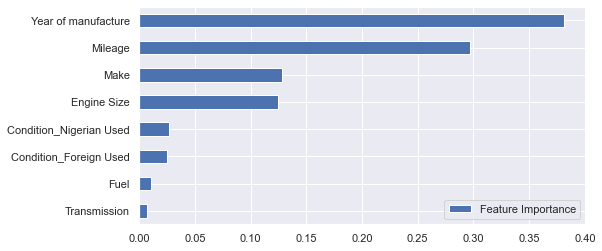

In [297]:
feat.plot(kind='barh', figsize=(8,4))

## Conclusion

**The data has a lot of missing values and outlier, I handled the missing values and remove the outliers**

**I tried different models, Out of all the model, Only random forest and gradient boosting algorithm perform best**

**Tried differnt hyperparameter values for the random forest model and decided to use 40 trees, max_depth of 10 and max_features of 5**

**The most important features for the prediction of price of car is Year of manufacture of the Car**